In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
df=pd.read_csv(r"C:\Users\Amrit\Downloads\AIML\wine_clustering\wine-clustering.csv")

In [5]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [9]:
df.shape

(178, 13)

In [11]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [15]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [21]:
scaler=StandardScaler()

In [23]:
x_scaled=scaler.fit_transform(df)

<Axes: xlabel='Alcohol', ylabel='count'>

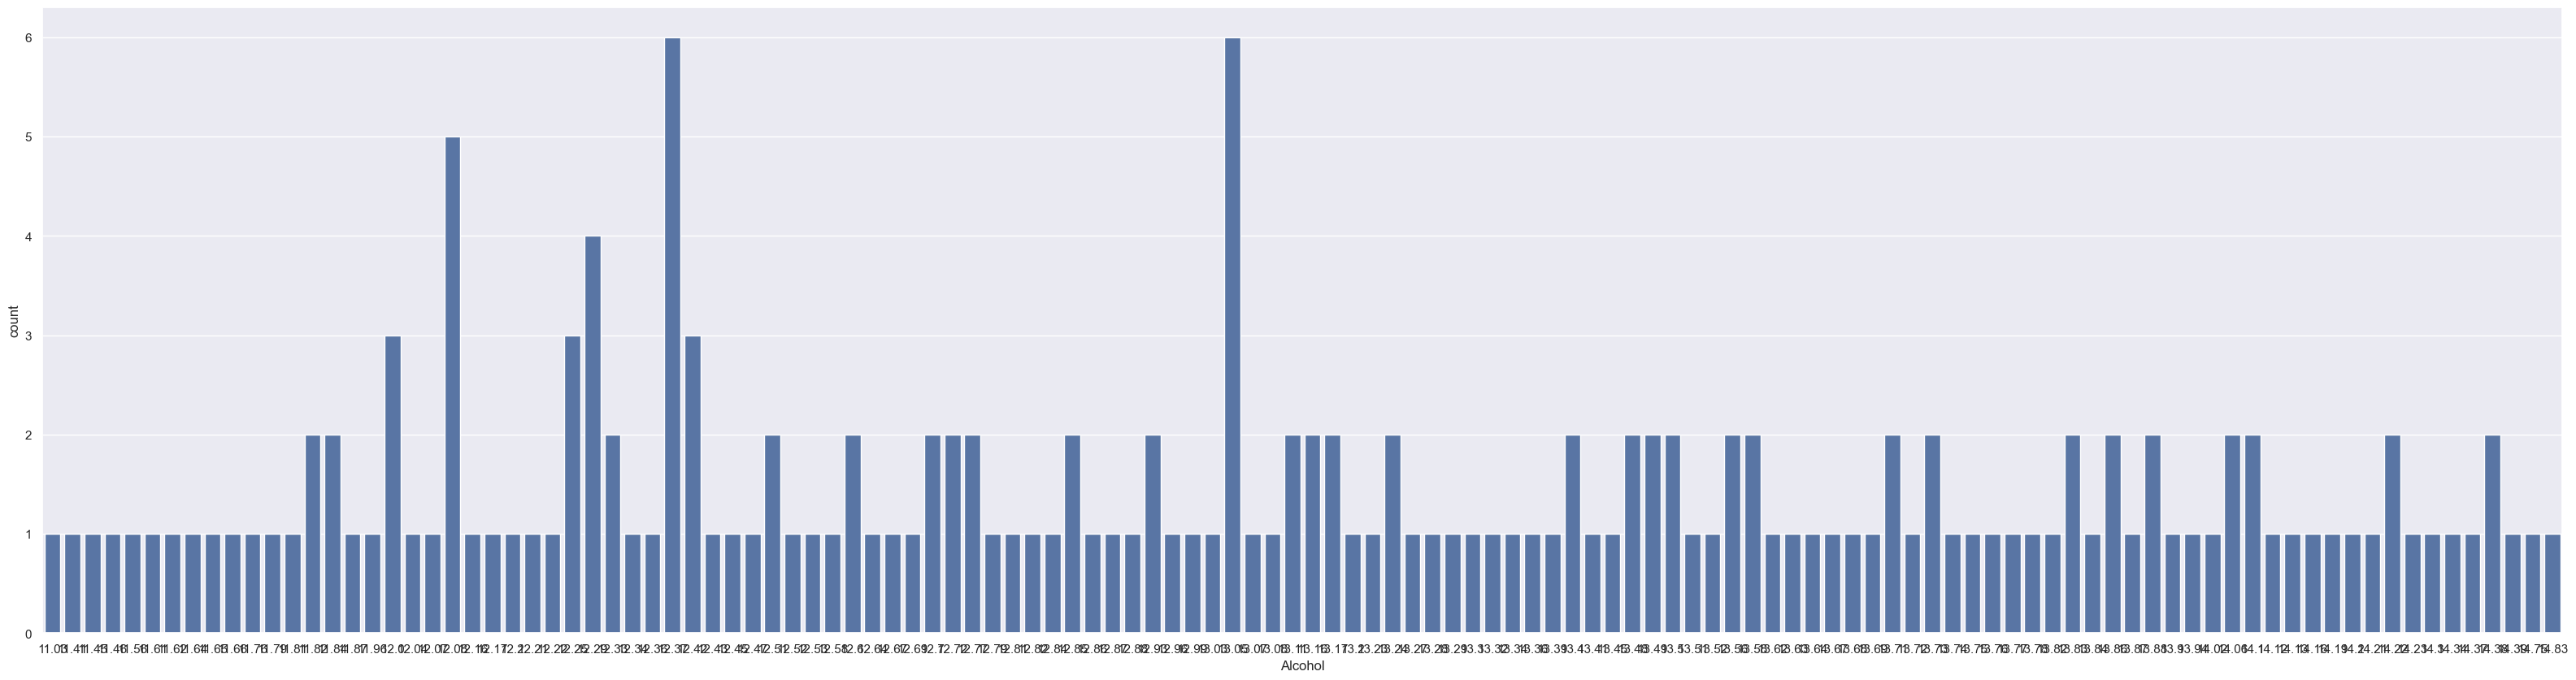

In [29]:
sns.set()
plt.figure(figsize=(40,10))
sns.countplot(data=df,x='Alcohol')

<Axes: xlabel='Proline', ylabel='Alcohol'>

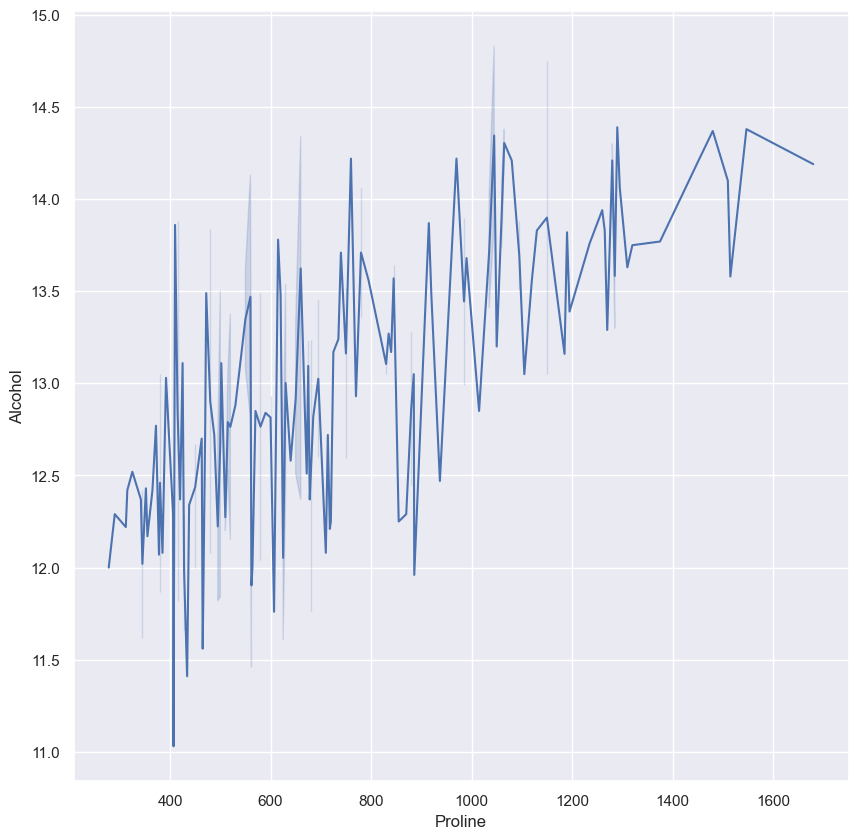

In [31]:
sns.set()
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x="Proline",y="Alcohol")

<Axes: xlabel='OD280', ylabel='Alcohol'>

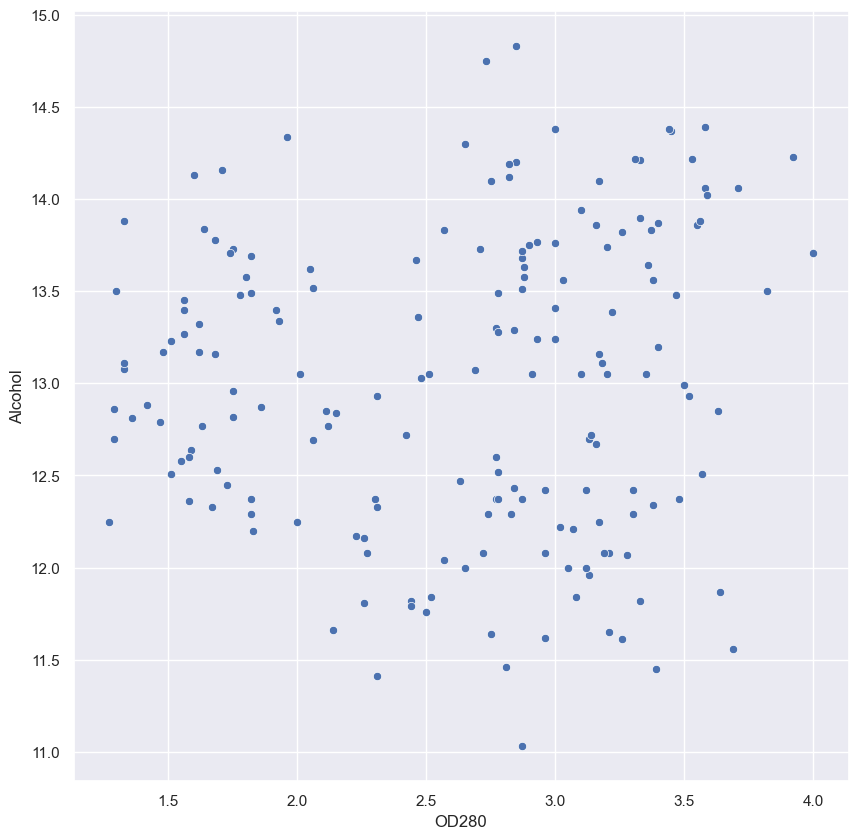

In [33]:
sns.set()
plt.figure(figsize=(10,10))
sns.scatterplot(x='OD280',y='Alcohol',data=df)

In [35]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Amrit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Amrit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Amrit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Amrit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

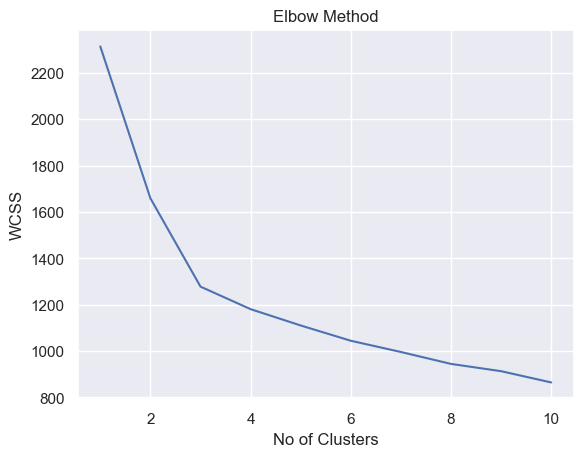

In [39]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

In [43]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x_scaled)

C:\Users\Amrit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


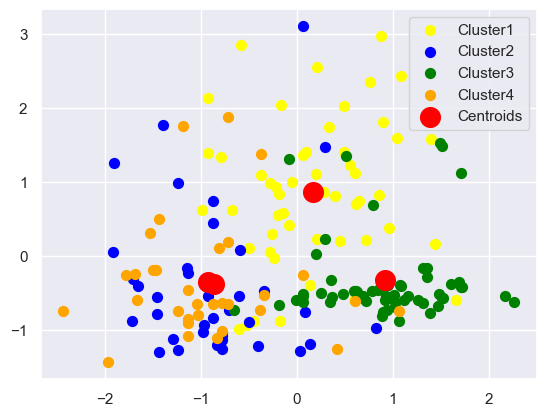

In [49]:
plt.scatter(x_scaled[y_kmeans==0,0],x_scaled[y_kmeans==0,1],s=50,c='yellow',label='Cluster1')
plt.scatter(x_scaled[y_kmeans==1,0],x_scaled[y_kmeans==1,1],s=50,c='blue',label='Cluster2')
plt.scatter(x_scaled[y_kmeans==2,0],x_scaled[y_kmeans==2,1],s=50,c='green',label='Cluster3')
plt.scatter(x_scaled[y_kmeans==3,0],x_scaled[y_kmeans==3,1],s=50,c='orange',label='Cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.legend()
plt.show()


In [51]:
def get_user_input():
    print("Enter values for the new data point:")
    Alcohol=float(input("Alcohol: "))
    Malic_Acid=float(input("Malic_Acid: "))
    Ash=float(input("Ash: "))
    Ash_Alcanity=float(input("Ash_Alcanity: "))
    Magnesium=float(input("Magnesium: "))
    Total_Phenols=float(input("Total_Phenols: "))
    Flavanoids=float(input("Flavanoids: "))
    Nonflavanoid_Phenols=float(input("Nonflavanoid_Phenols: "))
    Proanthocyanins=float(input("Proanthocyanins: "))
    Color_Intensity=float(input("Color_Intensity: "))
    Hue=float(input("Hue: "))
    OD280=float(input("OD280: "))
    Proline=float(input("Proline: "))
    return pd.DataFrame({
        'Alcohol':[Alcohol],
        'Malic_Acid':[Malic_Acid],
        'Ash':[Ash],
        'Ash_Alcanity':[Ash_Alcanity],
        'Magnesium':[Magnesium],
        'Total_Phenols':[Total_Phenols],
        'Flavanoids':[Flavanoids],
        'Nonflavanoid_Phenols':[Nonflavanoid_Phenols],
        'Proanthocyanins':[Proanthocyanins],
        'Color_Intensity':[Color_Intensity],
        'Hue':[Hue],
        'OD280':[OD280],
        'Proline':[Proline]
    })
    

In [55]:
new_df=get_user_input()
new_scaled=scaler.transform(new_df)
new_cluster=kmeans.predict(new_scaled)
print("Predict Cluster for New Data:",new_cluster[0])


Enter values for the new data point:


Alcohol:  13.05
Malic_Acid:  1.86
Ash:  2.36
Ash_Alcanity:  19.50
Magnesium:  98.0
Total_Phenols:  2.35
Flavanoids:  2.13
Nonflavanoid_Phenols:  0.34
Proanthocyanins:  1.55
Color_Intensity:  4.6
Hue:  0.96
OD280:  2.78
Proline:  673.5


Predict Cluster for New Data: 1
